In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
from astropy.io import fits
import easydarkfigs
%matplotlib inline

In [2]:
plt.style.use('cook')

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
%%time
from results import models, results, pcmds, data, radii_am, radii_kpc, dmods, regions

M87
M87v2
M49
NGC3377
NGC4993
M31
M51
CPU times: user 31 s, sys: 1.41 s, total: 32.4 s
Wall time: 33.5 s


In [5]:
%%time
from drivers import drivers, iso_models, filters

Loading Isochrone Models


KeyboardInterrupt: 

Saving light figure as figures/data_pcmds.pdf
Saving dark figure as figures_dark/data_pcmds_dark.pdf


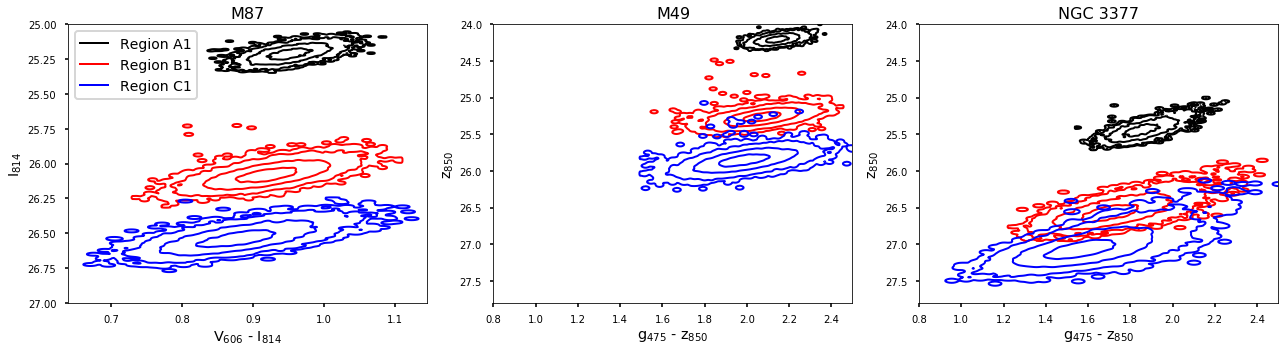

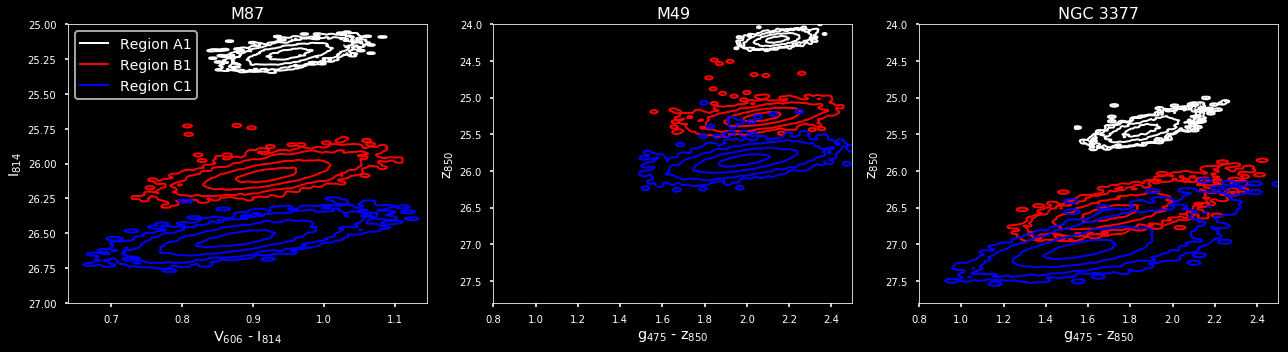

In [5]:
%%savefig_dark_light data_pcmds.pdf
fig, axes = plt.subplots(ncols=3, figsize=(18,5))
ppy.plotting.plot_pcmd_contours(data['M87_a1_m1'], ax=axes[0], color=('w' if is_dark else 'k'), label='Region A1')
ppy.plotting.plot_pcmd_contours(data['M87_b1_m1'], ax=axes[0], color='r', label='Region B1')
ppy.plotting.plot_pcmd_contours(data['M87_c1_m1'], ax=axes[0], color='b', label='Region C1', zorder=-10)
axes[0].legend(loc=2)

ppy.plotting.plot_pcmd_contours(data['M49_a1_m1'], ax=axes[1], color=('w' if is_dark else 'k'))
ppy.plotting.plot_pcmd_contours(data['M49_b1_m1'], ax=axes[1], color='r')
ppy.plotting.plot_pcmd_contours(data['M49_c1_m1'], ax=axes[1], color='b', zorder=-10)

ppy.plotting.plot_pcmd_contours(data['NGC3377_a1_m1'], ax=axes[2], color=('w' if is_dark else 'k'))
ppy.plotting.plot_pcmd_contours(data['NGC3377_b1_m1'], ax=axes[2], color='r')
ppy.plotting.plot_pcmd_contours(data['NGC3377_c1_m1'], ax=axes[2], color='b', zorder=-10)

axes[0].set_ylim([27.0, 25.0])
axes[1].set_ylim([27.8, 24.0])
axes[1].set_xlim([0.8, 2.5])
axes[2].set_ylim([27.8, 24.0])
axes[2].set_xlim([0.8, 2.5])

ppy.plotting.plot_isochrone(iso_models['M87'], axes=axes[0], alpha=0.)
ppy.plotting.plot_isochrone(iso_models['M49'], axes=axes[1], alpha=0.)
ppy.plotting.plot_isochrone(iso_models['NGC3377'], axes=axes[2], alpha=0.)
axes[0].set_title('M87')
axes[1].set_title('M49')
axes[2].set_title('NGC 3377')

fig.tight_layout()

# Exposure Times

In [4]:
exp_means = {}
exp_stds = {}

In [5]:
f = ppy.instrument.default_m87_filters(exp_ratio=1.0)
with fits.open('../data/M87/reduced/M87_F814W_drc.fits') as h:
    exp_r = h['WHT'].data / f[0]._exposure
    reg_r = h['REGIONS'].data
with fits.open('../data/M87/reduced/M87_F606W_drc.fits') as h:
    exp_b = h['WHT'].data / f[1]._exposure
    reg_b = h['REGIONS'].data
for q, r in enumerate([204, 201, 202, 203]):
    k = f'M87_r_a{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'M87_b_a{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([128, 125, 126, 127]):
    k = f'M87_r_b{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'M87_b_b{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([44, 41, 42, 43]):
    k = f'M87_r_c{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'M87_b_c{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])

In [6]:
f = ppy.instrument.default_m49_filters(exp_ratio=1.0)
with fits.open('../data/M49/reduced/M49_F850LP_drc.fits') as h:
    exp_r = h['WHT'].data / f[0]._exposure
    reg_r = h['REGIONS'].data
with fits.open('../data/M49/reduced/M49_F475W_drc.fits') as h:
    exp_b = h['WHT'].data / f[1]._exposure
    reg_b = h['REGIONS'].data
for q, r in enumerate([204, 201, 202, 203]):
    k = f'M49_r_a{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'M49_b_a{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([124, 121, 122, 123]):
    k = f'M49_r_b{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'M49_b_b{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([40, 37, 38, 39]):
    k = f'M49_r_c{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'M49_b_c{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])

In [11]:
f = ppy.instrument.default_ngc3377_filters(exp_ratio=1.0)
with fits.open('../data/NGC3377/reduced/NGC3377_F850LP_drc.fits') as h:
    exp_r = h['WHT'].data / f[0]._exposure
    reg_r = h['REGIONS'].data
with fits.open('../data/NGC3377/reduced/NGC3377_F475W_drc.fits') as h:
    exp_b = h['WHT'].data / f[1]._exposure
    reg_b = h['REGIONS'].data
for q, r in enumerate([173, 174, 175, 176]):
    k = f'NGC3377_r_a{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'NGC3377_b_a{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([97, 98, 99, 100]):
    k = f'NGC3377_r_b{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'NGC3377_b_b{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([41, 42, 43, 44]):
    k = f'NGC3377_r_c{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'NGC3377_b_c{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])

In [18]:
f = ppy.instrument.default_ngc4993_filters(exp_ratio=1.0)
with fits.open('../data/NGC4993/reduced/NGC4993_F850LP_drc.fits') as h:
    exp_r = h['WHT'].data / f[0]._exposure
    reg_r = h['REGIONS'].data
with fits.open('../data/NGC4993/reduced/NGC4993_F475W_drc.fits') as h:
    exp_b = h['WHT'].data / f[1]._exposure
    reg_b = h['REGIONS'].data
for q, r in enumerate([203,204,201,202]):
    k = f'NGC4993_r_a{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'NGC4993_b_a{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([143,144,141,142]):
    k = f'NGC4993_r_b{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'NGC4993_b_b{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])
for q, r in enumerate([83,84,81,82]):
    k = f'NGC4993_r_c{q+1}'
    exp_means[k] = np.mean(exp_r[reg_r == r])
    exp_stds[k] = np.std(exp_r[reg_r == r])
    k = f'NGC4993_b_c{q+1}'
    exp_means[k] = np.mean(exp_b[reg_b == r])
    exp_stds[k] = np.std(exp_b[reg_b == r])

Saving light figure as figures/exposure_variance.pdf
Saving dark figure as figures_dark/exposure_variance_dark.pdf


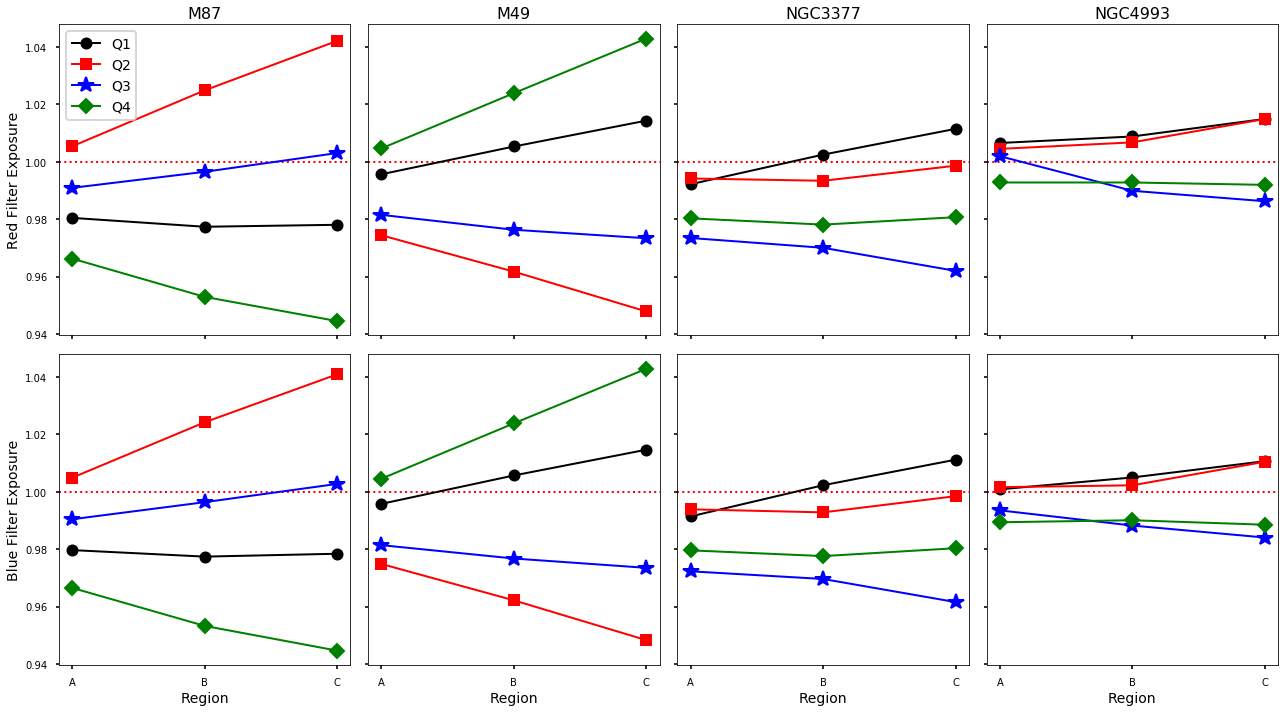

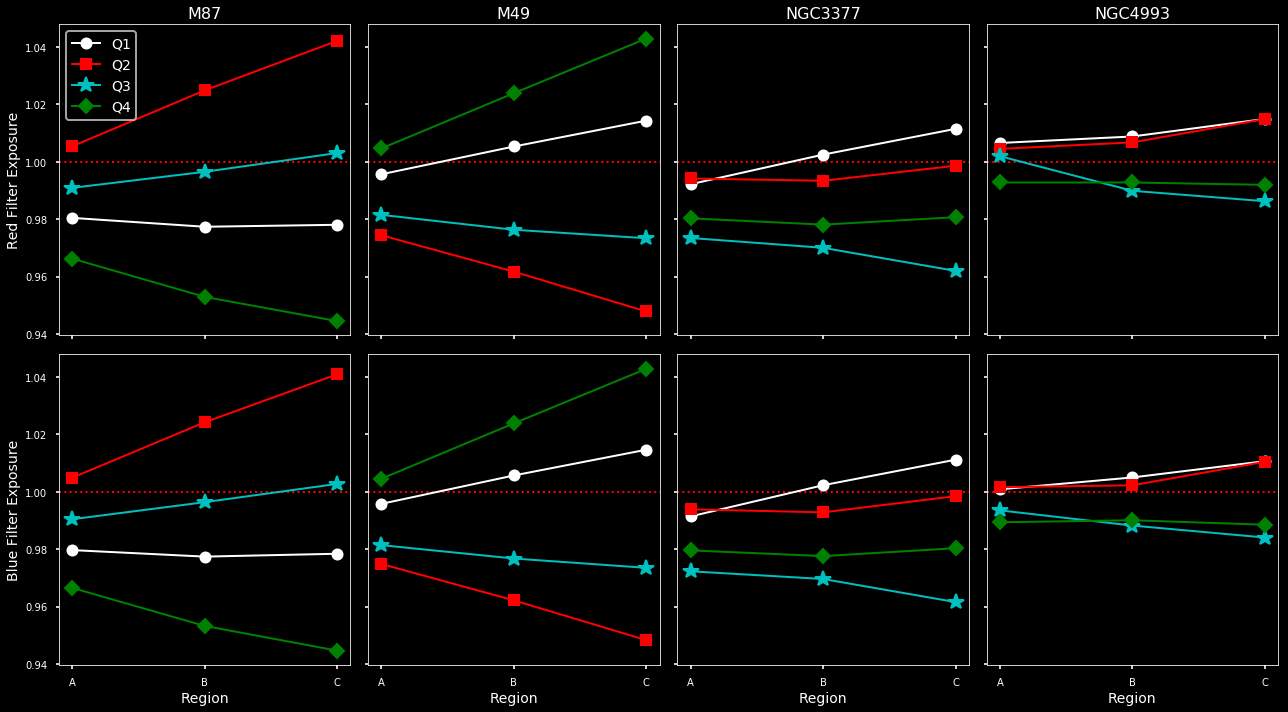

In [19]:
%%savefig_dark_light exposure_variance.pdf
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18, 10), sharex=True, sharey=True)
x = np.array([0,1,2])
for i, g in enumerate(['M87', 'M49', 'NGC3377', 'NGC4993']):
    axes[0,i].set_title(g)
    for j, f in enumerate(['r', 'b']):
        a = axes[j,i]
        a.axhline(y=1.0, ls=':', color='r')
        y = [exp_means[f'{g}_{f}_{r}1'] for r in ['a','b','c']]
        a.plot(x, y, color=('w' if is_dark else 'k'), marker='o', ms=10, ls='-', label=('Q1'))
        y = [exp_means[f'{g}_{f}_{r}2'] for r in ['a','b','c']]
        a.plot(x, y,  color='r', marker='s', ms=10, ls='-', label='Q2')
        y = [exp_means[f'{g}_{f}_{r}3'] for r in ['a','b','c']]
        a.plot(x, y, color=('c' if is_dark else 'b'), marker='*', ms=16, ls='-', label='Q3')
        y = [exp_means[f'{g}_{f}_{r}4'] for r in ['a','b','c']]
        a.plot(x, y, color='g', marker='D', ms=10, ls='-', label='Q4')
axes[0,0].legend(loc=0)
axes[0,0].set_xticks([0,1,2])
axes[0,0].set_xticklabels(['A', 'B', 'C'])
axes[0,0].set_ylabel('Red Filter Exposure')
axes[1,0].set_ylabel('Blue Filter Exposure')
for a in axes[1]:
    a.set_xlabel('Region')
fig.tight_layout()

Saving light figure as figures/exposure_variance_errors.pdf
Saving dark figure as figures_dark/exposure_variance_errors_dark.pdf


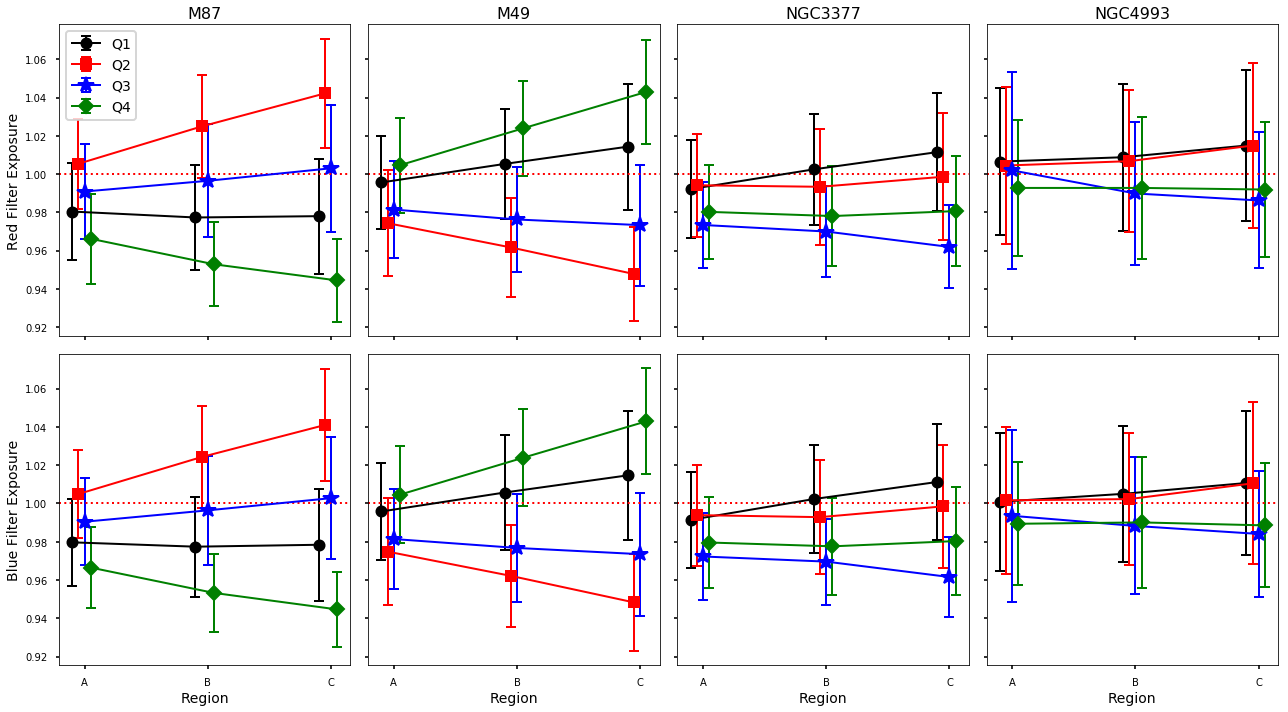

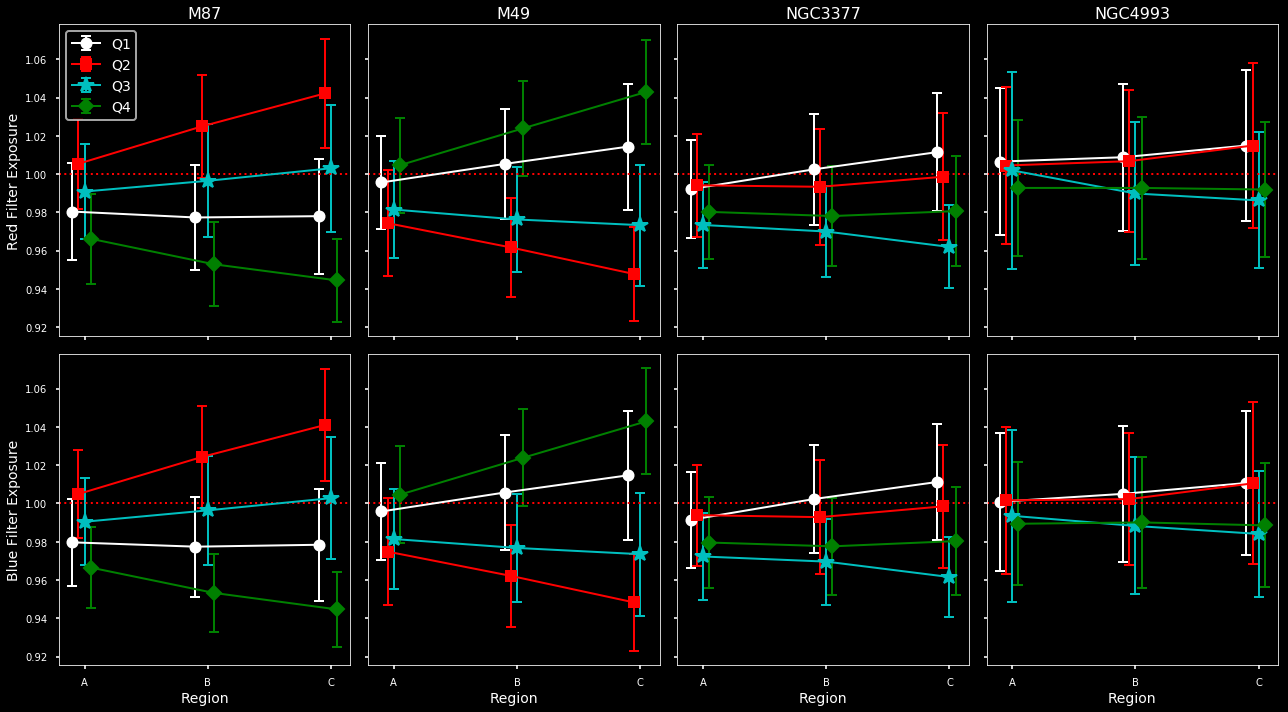

In [20]:
%%savefig_dark_light exposure_variance_errors.pdf
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18, 10), sharex=True, sharey=True)
x = np.array([0,1,2])
for i, g in enumerate(['M87', 'M49', 'NGC3377', 'NGC4993']):
    axes[0,i].set_title(g)
    for j, f in enumerate(['r', 'b']):
        a = axes[j,i]
        a.axhline(y=1.0, ls=':', color='r')
        y = [exp_means[f'{g}_{f}_{r}1'] for r in ['a','b','c']]
        yerr = [exp_stds[f'{g}_{f}_{r}1'] for r in ['a','b','c']]
        a.errorbar(x-0.1, y, yerr=yerr, color=('w' if is_dark else 'k'), capsize=5, marker='o', ms=10, ls='-', label=('Q1'))
        y = [exp_means[f'{g}_{f}_{r}2'] for r in ['a','b','c']]
        yerr = [exp_stds[f'{g}_{f}_{r}2'] for r in ['a','b','c']]
        a.errorbar(x-0.05, y, yerr=yerr, color='r', marker='s', ms=10, capsize=5, ls='-', label='Q2')
        y = [exp_means[f'{g}_{f}_{r}3'] for r in ['a','b','c']]
        yerr = [exp_stds[f'{g}_{f}_{r}3'] for r in ['a','b','c']]
        a.errorbar(x, y, yerr=yerr, color=('c' if is_dark else 'b'), capsize=5, marker='*', ms=16, ls='-', label='Q3')
        y = [exp_means[f'{g}_{f}_{r}4'] for r in ['a','b','c']]
        yerr = [exp_stds[f'{g}_{f}_{r}4'] for r in ['a','b','c']]
        a.errorbar(x+0.05, y, yerr=yerr, color='g', marker='D', ms=10, capsize=5, ls='-', label='Q4')
axes[0,0].legend(loc=0)
axes[0,0].set_xticks([0,1,2])
axes[0,0].set_xticklabels(['A', 'B', 'C'])
axes[0,0].set_ylabel('Red Filter Exposure')
axes[1,0].set_ylabel('Blue Filter Exposure')
for a in axes[1]:
    a.set_xlabel('Region')
fig.tight_layout()